#### 분류 평가
- TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
- 앞문자 TruelFalse는 예측값과 실제 값이 같은가 틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정 긍정을 의미
- TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
- FP는 예측값을 Positive 값 1로 예측했고 실제 값은 Negative 값 0
- FN은 예측값을 Negative 값 0으로 예측했고 실제 값은 Positive 값 1
- TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1

=========================================================================================
- 정확도 = (TP + TN) / ( TP + TN + FP + FN)
- 정밀도 = TP / ( TP + FP)
- 재현율 = TPI (TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
- F1 = 2 * ( 정밀도 * 재현을) / (정밀도 + 재현율)
=========================================================================================

- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)

#### 정밀도 / 재현율 트레이드오프
- 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임

#### 예측 확률을 반환하는 predict_proba()
사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
그리고 예측 확률이 큰 레이블 값으로 예측
이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
tit_df = pd.read_csv('dataset/train.csv')
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 과제 6개 알고리즘 적용, 학습/예측/평가를 수행 하세요.
# 6개 알고리즘에 대한 요약

#KNN, 서포트백터머신, 렌덤포레스트, decision tree, GBM, logistic Regression

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()
# 최근접 이웃 ( 변수를 기준으로 가장 가까이 있는 변수에 대해 매칭 )
svm = SVC()
# 서포트 벡터 머신 ( 기준 선을 정의한뒤 새로운 변수의 위치에 따라 선을 기준으로 분류 )
rf = RandomForestClassifier()
# 의사 결정 나무 ( 노드의 질문에 대한 답으로 분류*) *회귀모형도 가능
gbm = GradientBoostingClassifier()

dt = DecisionTreeClassifier()
# 의사 결정 나무 ( 노드의 질문에 대한 답으로 분류*) *회귀모형도 가능
lr = LogisticRegression()
# 선형회귀 

mod = [knn,svm,rf,gbm,dt,lr,gbm]


y_df = tit_df.Survived
X_df = tit_df.drop('Survived',axis=1)
X_df = transform_features(X_df)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df,
                                                   test_size = 0.2,
                                                    random_state=20
                                                    )

for i in mod:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("{}의 정확도 : {:.4f}".format(i,accuracy_score(y_test,pred)))

KNeighborsClassifier()의 정확도 : 0.7207
SVC()의 정확도 : 0.6872
RandomForestClassifier()의 정확도 : 0.8045
GradientBoostingClassifier()의 정확도 : 0.8156
DecisionTreeClassifier()의 정확도 : 0.8268
LogisticRegression()의 정확도 : 0.8268
GradientBoostingClassifier()의 정확도 : 0.8156


In [6]:
y_df = tit_df.Survived
X_df = tit_df.drop('Survived',axis=1)
X_df = transform_features(X_df)

X_train, X_test , y_train, y_test = train_test_split(X_df, y_df,
                                                    test_size = 0.2 , random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8491620111731844

In [7]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print(pred_proba[:3])
print()
print(pred.reshape(-1,1)[:3])

[[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]]

[[1]
 [0]
 [0]]


In [8]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# Binarizer (threshold = ) : threshold 기준 값 보다 같거나 작으면 0 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [9]:
custom_threshold = 0.5
print('pred_proba: \n', pred_proba[:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률 : \n',pred_proba_1[:5])
print()
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict

pred_proba: 
 [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]
 [0.88249485 0.11750515]
 [0.85549349 0.14450651]]

생존확률 : 
 [[0.5376491 ]
 [0.12124118]
 [0.12282543]
 [0.11750515]
 [0.14450651]]



array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [10]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# precision_score : 정밀도 , recall_score : 재현율


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬(혼동행렬)')
    print(confusion)
    print()
    print('정확도:{:.4f}\n정밀도:{:.4f}\n재현율:{:.4f}\nf1:{:.4f}'.format(accuracy, precision, recall, f1))
    

get_clf_eval(y_test,custom_predict)

오차 행렬(혼동행렬)
[[104  14]
 [ 13  48]]

정확도:0.8492
정밀도:0.7742
재현율:0.7869
f1:0.7805


In [11]:
# 정확도 = (TP + TN) / ( TP + TN + FP + FN)
# 정밀도 = TP / ( TP + FP)
# 재현율 = TP / ( TP + FN)

print('정확도: ', (48+104) / (104+14+13+48))
print('정밀도: ', 48 / (48+14))
print('재현율: ', 48 / (48+13))
print('f1: ',2 * (48 / (14+48))*(48 / (13+48)) / ((48 / (14+48)) + (48 / (13+48))))

정확도:  0.8491620111731844
정밀도:  0.7741935483870968
재현율:  0.7868852459016393
f1:  0.7804878048780488


In [12]:
Label = np.unique([y_test, pred])
confustion_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=Label), 
    index=['true:{:}'.format(x) for x in Label], 
    columns=['pred:{:}'.format(x) for x in Label])
print(confustion_matrix)

        pred:0  pred:1
true:0     104      14
true:1      13      48


In [13]:
# 임계값이 커지면 양성 예측이 적어지므로 FP 가 적어지고 정밀도가 증가한다.
# 정밀도와 재현율은 Trade-off 관계로 정밀도가 증가하면 재현율은 감소한다.
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iterartion 하면서 evaluation 수행
    for custom_threshold in threshold:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print()
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

NameError: name 'threshold' is not defined

In [14]:
# 임계값 변화에 따른 평가 지표 값 : 싸이킷런 precision_recall_curve() API
# precision_recall_curve()는 일반적으로 0.10~0.97 정도의 임계값을 갖는 넘파이 ndarray와
# 이 임계깞에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추측
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve의 인자로 입력
precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임계값 배열의 Shape: ', thresholds.shape)
print()
# 번환된 임계값 배열 로우가 147건 이므로 샘플로 10건만 추출하되 , 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index],2))

# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
# 임계값이 증가할수록 Positive 예측은 감소, FP 감소, 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 확인
print()
print('샘플 임계값별 정밀도', np.round(precision[thr_index],3))
print('샘플 임계값별 재현율', np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 Shape:  (143,)

샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]

샘플 임계값별 정밀도 [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


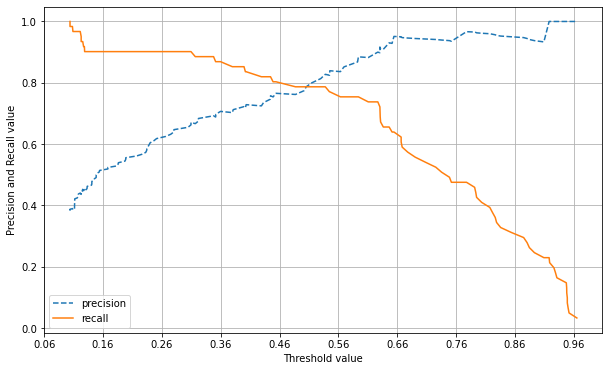

In [114]:
# percision_recall_curve() API는 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarry와 이 threshold에 따른 정밀도, 재현율, ndarray추출
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    
    plt.figure(figsize=(10,6))
    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    # threshold의 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show
    
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

## 결과해석

- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐 (FN이 작아지고 FP가 커짐)
- 로지스틱 회귀 기반의 타이타닉 생종자 예측 모델의 경우 임계값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용


## 정밀도 및 재현율 활요시 유의 사항

- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
- 정밀도 100%가 되는 방법 : 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측 전체 환자는 1000명중 확실한
                         Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측
                         FP는 0 , TP는 1이 되며 정밀도(TP/TP+FP) 는 30/(30+0) = 1
  
- 재현율 100%가 되는 방법 : 모든 환자를 Positive로 예측 1000명의 환자 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0 이므로
                         재현율 (TP/(TP+FN)) 은 30/(30+0) = 1
                         
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨


## ROC 곡선과 AUC

- 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FPR이 변할떄 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1-특이성(TNR), TPR은 재현율(민감도)를 나타냄
- TNR은 TN/(TN+FP) 이며 FPR은 FP/(TN+FP)임
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR의 변화 값을 구함
- FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임계값을 변경하면 됨
- FPR을 0으로 만들려면 임계값을 1로 지정하고 반대로 FPR을 1로 만들려면 임계값을 0으로 지정하면 됨

In [45]:
y_df = tit_df.Survived
X_df = tit_df.drop('Survived',axis=1)
X_df = transform_features(X_df)

X_train, X_test , y_train, y_test = train_test_split(X_df, y_df,
                                                    test_size = 0.2 , random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8491620111731844

In [51]:
from sklearn.metrics import roc_curve

pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, threshold = roc_curve(y_test, pred_proba_c1)
thr_index = np.arange(1,threshold.shape[0],5)
print(np.round(threshold[thr_index],2))
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))

[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
[0.   0.02 0.03 0.08 0.13 0.17 0.2  0.47 0.58 0.69 0.8 ]
[0.03 0.64 0.72 0.75 0.8  0.84 0.89 0.9  0.93 0.97 0.98]


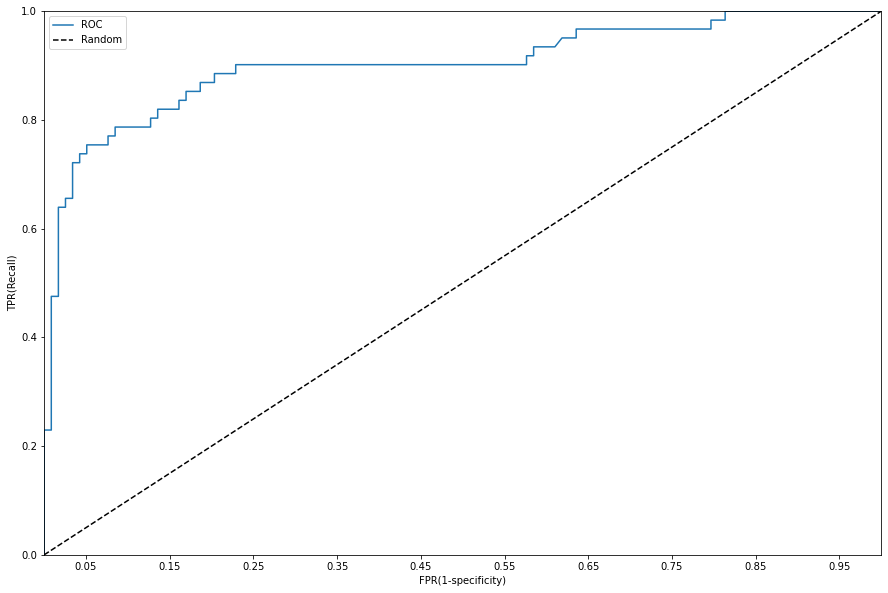

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

def roc_curve_plot(y_test, pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-specificity)')
    plt.ylabel('TPR(Recall)')
    
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [58]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값:{:.4f}'.format(roc_score))

ROC AUC 값:0.9025


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# precision_score : 정밀도 , recall_score : 재현율


def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬(혼동행렬)')
    print(confusion)
    print()
    print('정확도:{:.4f}\n정밀도:{:.4f}\n재현율:{:.4f}\nf1:{:.4f}'.format(accuracy, precision, recall, f1))
    
get_clf_eval(y_test,pred,pred_proba)

오차 행렬(혼동행렬)
[[104  14]
 [ 13  48]]

정확도:0.8492
정밀도:0.7742
재현율:0.7869
f1:0.7805


In [ ]:
# 과제

Q. 분류기 - DT,parameters , cv=5, scoring='accuracy' 를 적용하여 교차검증과 성능 개선을 위한 하이퍼파라미터 튜니을을 수행하여
   최적의 모델을 생성 한 후 평가하세요, 단 평가는 분류평가지표 모두를 포함하는 사용자 함수를 작성하여 수행 [ 파라미터 ]
    
    - min_dapth : [2,3,5,10]
    - min_samples_split : [2,3,5]
    -min_samples_leaf : [1,5,8]

In [115]:
from sklearn.tree import DecisionTreeClassifier

y_df = tit_df.Survived
X_df = tit_df.drop('Survived',axis=1)
X_df = transform_features(X_df)

X_train, X_test , y_train, y_test = train_test_split(X_df, y_df,
                                                    test_size = 0.2 , random_state = 11)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8491620111731844

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

parameters = { 'min_depth' : [2,3,5,10],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8] }

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, refit=True)

grid_dclf.fit(X_train,y_train)
print(grid_dclf)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {:.4f}'.format(grid_dclf.best_score_))

ValueError: Invalid parameter min_depth for estimator DecisionTreeClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.